In [23]:
from chaotic_encrypter.keygen import ChaosKey
import matplotlib.pyplot as plt
from pathlib import Path

STEPS=5000
KEYPATH_1 = Path(Path.home().joinpath(".chaos-encrypt/key_1.yaml"))
KEYPATH_2 = Path(Path.home().joinpath(".chaos-encrypt/key_2.yaml"))

In [24]:
chaos_key = ChaosKey()
args_1 = chaos_key(KEYPATH_1)
args_2 = chaos_key(KEYPATH_2)

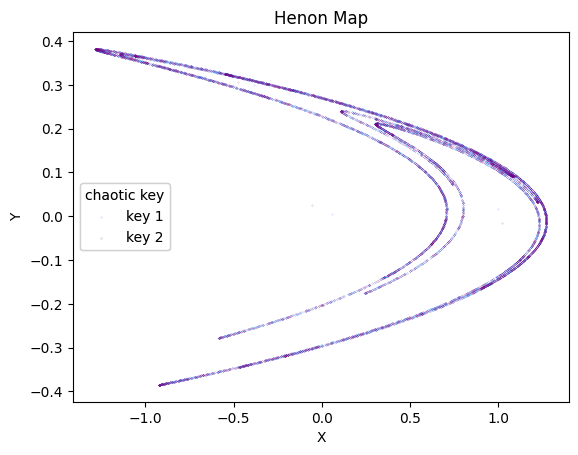

In [25]:
h1 = args_1["henon"]["func"](STEPS)
h2 = args_2["henon"]["func"](STEPS)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(*h1, color="dodgerblue", s=.01, label="key 1")
ax.scatter(*h2, color="purple", s=.01, label="key 2")
legend = ax.legend( loc="center left", title="chaotic key")
ax.add_artist(legend)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Henon Map')
plt.show()

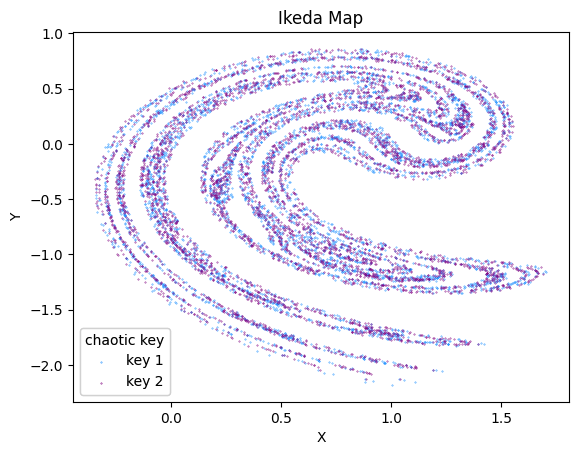

In [26]:
i1 = args_1["ikeda"]["func"](STEPS)
i2 = args_2["ikeda"]["func"](STEPS)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(*i1, color="dodgerblue", s=.1, label="key 1")
ax.scatter(*i2, color="purple", s=.1, label="key 2")
legend = ax.legend( loc="lower left", title="chaotic key")
ax.add_artist(legend)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Ikeda Map')
plt.show()

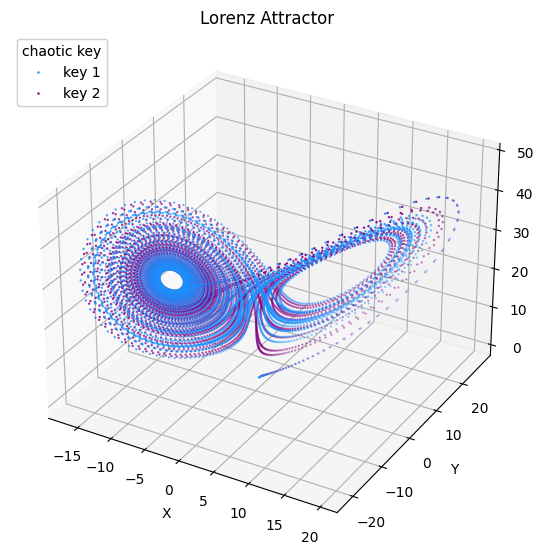

In [27]:
l1 = args_1["lorenz"]["func"](STEPS)
l2 = args_2["lorenz"]["func"](STEPS)
fig = plt.figure(figsize=(10, 6.667))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(*l1, color="dodgerblue", s=.5, label="key 1")
ax.scatter(*l2, color="purple", s=.5, label="key 2")
legend = ax.legend( loc="upper left", title="chaotic key")
ax.add_artist(legend)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor')
plt.show()

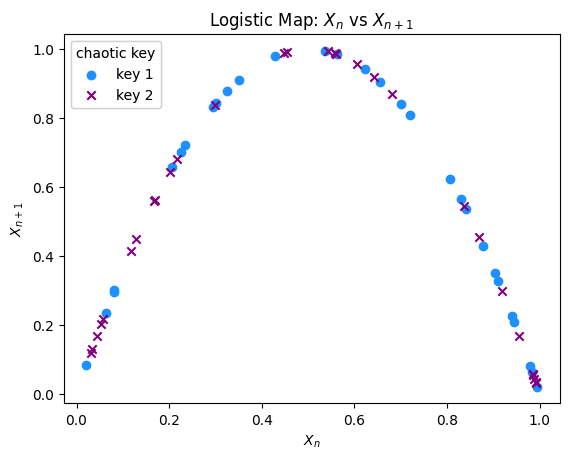

In [28]:
log_1 = args_1["logistic"]["func"](30)
log_2 = args_2["logistic"]["func"](30)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(log_1[:, :-1], log_1[:, 1:], color="dodgerblue", label="key 1")
ax.scatter(log_2[:, :-1], log_2[:, 1:], marker="x", color="purple", label="key 2")
legend = ax.legend( loc="upper left", title="chaotic key")
ax.add_artist(legend)
ax.set_xlabel('$X_n$')
ax.set_ylabel('$X_{n+1}$')
ax.set_title('Logistic Map: $X_n$ vs $X_{n+1}$')
plt.show()

In [29]:
log_1[:, :-1]

array([[0.94535167, 0.20664757, 0.65577741, 0.9029336 , 0.35057805,
        0.91069233, 0.32532724, 0.87795771, 0.42859187, 0.97960352,
        0.07992186, 0.29413743, 0.83048241, 0.56312551, 0.98406068,
        0.06274103, 0.23521839, 0.7195628 , 0.80716871, 0.62258952,
        0.93988723, 0.22599688, 0.69968917, 0.84049694, 0.53624733,
        0.99474452, 0.02091143, 0.08189656, 0.30075804]])

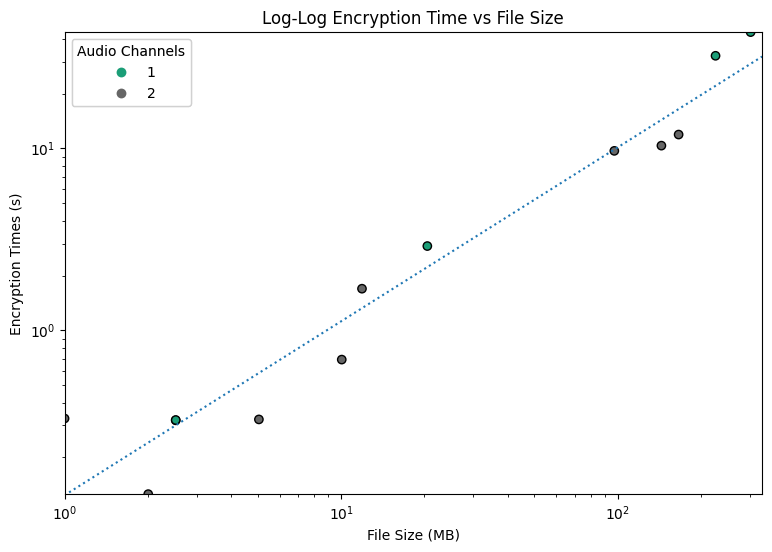

In [30]:
import pandas as pd
import numpy as np

times = pd.read_csv("metrics/file_times.csv", index_col=0)

x = times["size"]
y = times["encryption_time"]
c = times["channels"]

fig, ax = plt.subplots(figsize=(9, 6))
scatter = ax.scatter(x, y, c=c, cmap="Dark2", edgecolors="k", label=c)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim(x.min(), x.max()*1.1)
ax.set_ylim(y.min(), y.max())

ax.set_xlabel("File Size (MB)")
ax.set_ylabel("Encryption Times (s)")
ax.set_title("Log-Log Encryption Time vs File Size")

legend = ax.legend(*scatter.legend_elements(), loc="upper left", title="Audio Channels")
ax.add_artist(legend)

z = np.linspace(x.min()/2, x.max()*1.1)  # start at 1, to avoid error from log(0)

logA = np.log(x)  # no need for list comprehension since all z values >= 1
logB = np.log(y)

m, b = np.polyfit(logA, logB, 1)  # fit log(y) = m*log(x) + c
y_fit = np.exp(m * np.log(z) + b)  # calculate the fitted values of y

plt.plot(z, y_fit, ':')

plt.show()